In [2]:
import json
import math
## Create a class for Naive Bayes model
class NaiveBayesClassifier:
    ## Constructor method
    def __init__(self, train_data, vocabulary):
        # Training data containing labels and corresponding features
        self.train_data = train_data
         # Vocabulary containing all unique words in the dataset
        self.vocabulary = vocabulary
        # Set of unique classes in the training data
        self.classes = set(label for label, _ in train_data)
        # Dictionary to store prior probabilities for each class
        self.priors = {}
        # Nested dictionary to store likelihood probabilities for each word in each class
        self.likelihoods = {label: {word: 0 for word in vocabulary} for label in self.classes}
        # Compute priors and likelihoods during initialization
        self.compute_priors()
        self.compute_likelihoods()
     # Method to compute prior probabilities for each class
    def compute_priors(self):
        total_docs = len(self.train_data)
        for label in self.classes:
            # Count the number of documents belonging to the current class
            docs_in_class = sum(1 for lbl, _ in self.train_data if lbl == label)
            # Calculate prior probability for the class
            self.priors[label] = docs_in_class / total_docs
    # Method to compute likelihood probabilities for each word in each class
    def compute_likelihoods(self):
        class_word_counts = {label: {word: 0 for word in self.vocabulary} for label in self.classes}
        class_total_words = {label: 0 for label in self.classes}
        # Iterate through training data
        for label, doc in self.train_data:
            ## update word counts and total word counts for each class
            for word, count in doc.items():
                class_word_counts[label][word] += count
                class_total_words[label] += count
        ## calculate likelihood using laplace smoothing
        for label in self.classes:
            total_words = sum(class_word_counts[label].values())
            for word in self.vocabulary:
                ## add one smoothing for each word
                self.likelihoods[label][word] = (class_word_counts[label][word] + 1) / (total_words + len(self.vocabulary))
     # Method to predict the class for test features
    def predict(self, test_features):
        ## dict to store log probs
        class_probs = {}
        for label in self.classes:
            ## initialize log prob with prior prob
            class_probs[label] = math.log(self.priors[label])
            for word, count in test_features.items():
                if word in self.vocabulary:
                    ## update log prob using likelihood
                    class_probs[label] += count * math.log(self.likelihoods[label][word])

        return max(class_probs, key=class_probs.get)
     # Method to calculate accuracy of the model
    def calculate_accuracy(self, test_data):
        correct_predictions = 0
        total_predictions = len(test_data)
        for label, features in test_data:
             # Predict the class for test features
            predicted_class = self.predict(features)
            if predicted_class == label:
                correct_predictions += 1
        return correct_predictions / total_predictions


def load_data(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            vector = json.loads(line)
            label = list(vector.keys())[0]  # Extract the label
            features = vector[label]  # Extract the feature vector
            data.append((label, features))  # Append as a single tuple
    return data

# Load training data
train_input_file_path = "/Users/ocn/desktop/NLP_assignment2/movie-review-BOWtrain.NB"
training_data = load_data(train_input_file_path)

# Extract vocabulary
vocabulary = set([line.rstrip() for line in open('/Users/ocn/Desktop/movie-review-HW2/aclImdb/imdb.vocab')])

# Create Naive Bayes Classifier
classifier = NaiveBayesClassifier(training_data, vocabulary)

# Load test data
test_input_file_path = "/Users/ocn/desktop/NLP_assignment2/movie-review-BOWtest.NB"
test_data = load_data(test_input_file_path)

# Predict labels for test data
predicted_labels = [classifier.predict(features) for _, features in test_data]

# Calculate actual labels for the test data
actual_labels = [label for label, _ in test_data]

# Calculate accuracy
accuracy = classifier.calculate_accuracy(test_data)

# Write predicted and actual labels side by side into a text file
output_file_path = "/Users/ocn/desktop/NLP_assignment2/predictions.txt"
with open(output_file_path, "w") as output_file:
    for predicted_label, actual_label in zip(predicted_labels, actual_labels):
        output_file.write(f"Predicted: {predicted_label}\tActual: {actual_label}\n")
    output_file.write(f"Accuracy: {accuracy}")

print("Predictions written to:", output_file_path)


Predictions written to: /Users/ocn/desktop/NLP_assignment2/predictions.txt


In [3]:
print("The accuracy odf the test data is",accuracy*100)

The accuracy odf the test data is 81.312


In [4]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(actual_labels, predicted_labels)

# Print the classification report
print("Classification Report:")
print(report)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Classification Report:
              precision    recall  f1-score   support

         neg       0.78      0.88      0.82     12500
         pos       0.86      0.75      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000



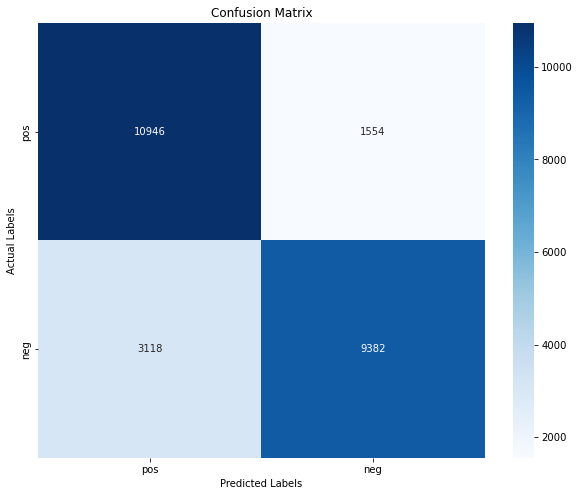

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classifier.classes, yticklabels=classifier.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

#### CONCLUSION:
#### The result of this  test was decent as we are able to achieve 81.3 % of accuracy for the test data. This is the confusion matrix for the predicted neg and pos documents. Negative classes are predicted more than positive class in this test. Negative are predicted more than 14,064 and positive are predicted below 10,936.  The accuracy is better as it is over 80%.  Reason behind incorrect predictions  may be because of any step missed in preprocessing . Both the classes have same prior probability of 0.5.  When I tried different preprocessing methods like removing stop words, single characters and removing words with low frequency. The accuracy got lower than 55.8%. Since, the vocabulary has many punctuations like – which is attached to the words like well-beings. So, applied preprocessing according to the vocabulary. 

#### In future the plan is to check the model again and increase the performance without any bias and get the accuracy above 90%.  

### 